# K Nearest Neighbors Algorithm

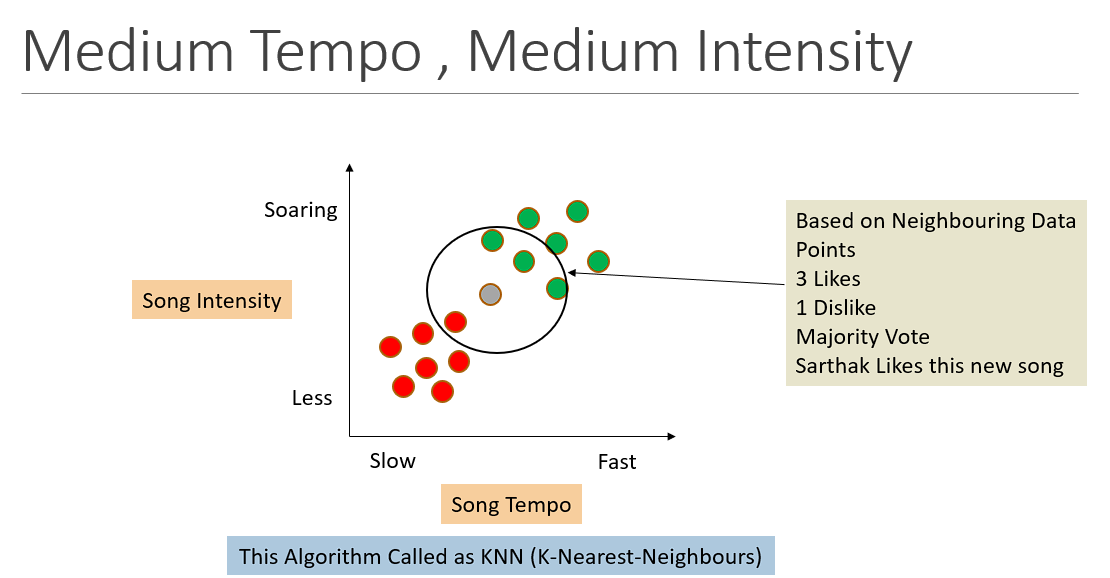

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### KNN is better for smaller datasets ussually

### Reading the dataset

In [2]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Missing values in dataframe

In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Species value counts

In [5]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Seperate X and Y features

In [6]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


### Create a preprocesing pipeline for X

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [10]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

In [12]:
X_pre = num_pipe.fit_transform(X)
X_pre[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [13]:
cols = num_pipe.get_feature_names_out()
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [14]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Train test split

In [15]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=21)

In [16]:
xtrain.shape

(100, 4)

In [17]:
xtest.shape

(50, 4)

In [18]:
ytrain.value_counts()

species   
virginica     35
versicolor    33
setosa        32
Name: count, dtype: int64

In [19]:
ytest.value_counts()

species   
setosa        18
versicolor    17
virginica     15
Name: count, dtype: int64

### Create a K-Neighbors-Classifier Algorithm

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=40)
model.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=40)

In [21]:
model.score(xtrain, ytrain)

0.88

In [22]:
model.score(xtest, ytest)

0.82

### Hyperparameter tuning 

In [23]:
params = {'n_neighbors':[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}

In [24]:
from sklearn.model_selection import RandomizedSearchCV
knn = KNeighborsClassifier()
rscv = RandomizedSearchCV(knn, param_distributions=params, cv=5, scoring='f1_macro')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9,
                                                        10, 11]},
                   scoring='f1_macro')

In [25]:
rscv.best_params_

{'n_neighbors': 3}

In [26]:
rscv.best_score_

0.9696658896658896

In [27]:
best_knn = rscv.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=3)

### Evaluate best KNN model

In [28]:
best_knn.score(xtrain, ytrain)

0.97

In [30]:
best_knn.score(xtest, ytest)

0.88

### Predict results for train and test

In [32]:
ypred_tr = best_knn.predict(xtrain)
ypred_ts = best_knn.predict(xtest)

In [33]:
ypred_tr[0:5]

array(['versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [34]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
118,virginica
55,versicolor


In [35]:
ypred_ts[0:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [36]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


### Confusion matrix

In [37]:
best_knn.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

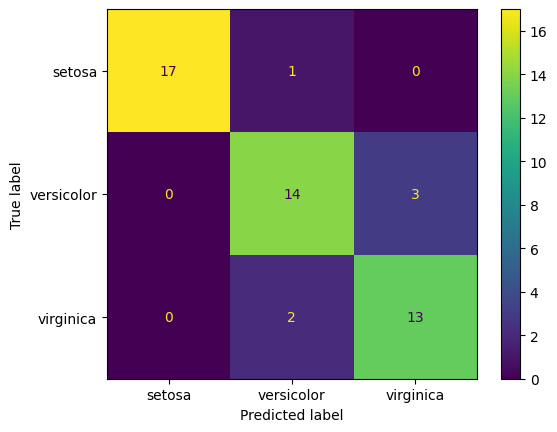

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_knn.classes_)
cfd.plot()

## Print Classification Report

In [39]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

      setosa       1.00      0.94      0.97        18
  versicolor       0.82      0.82      0.82        17
   virginica       0.81      0.87      0.84        15

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50



### Predicting out of sample data

In [40]:
xnew = pd.read_csv('iris_sample.csv')
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [42]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

array([[-0.41600969, -1.28296331,  0.13754657,  0.13250973],
       [ 1.2803405 ,  0.09821729,  0.76275827,  1.44883158],
       [-0.90068117, -1.28296331, -0.4308277 , -0.13075464],
       [-1.74885626, -0.36217625,  0.        , -1.3154443 ],
       [ 0.06866179, -0.13197948,  0.76275827,  0.79067065],
       [-0.41600969,  1.01900435, -1.39706395, -1.3154443 ],
       [-0.29484182,  0.        , -0.08980313,  0.13250973],
       [ 0.79566902, -0.13197948,  0.8195957 ,  1.05393502],
       [-0.65834543,  1.47939788, -1.2833891 , -1.3154443 ],
       [-0.90068117,  0.78880759, -1.2833891 ,  0.        ],
       [ 0.31099753, -0.59237301,  0.13754657,  0.13250973],
       [-0.41600969, -1.51316008, -0.03296571, -0.26238682],
       [ 2.24968346, -0.13197948,  1.33113254,  1.44883158],
       [ 1.2803405 ,  0.09821729,  0.64908342,  0.3957741 ],
       [ 0.18982966, -1.97355361,  0.70592084,  0.3957741 ]])

In [43]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


In [44]:
preds = best_knn.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [45]:
probs = best_knn.predict_proba(xnew_pre)
probs

array([[0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.66666667, 0.33333333]])

In [46]:
import numpy as np 
max_probs = np.max(probs, axis=1)
max_probs

array([1.        , 1.        , 1.        , 1.        , 0.66666667,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.66666667])

### Save predictions and probability in xnew dataframe

In [47]:
xnew['species_pred']=preds
xnew['species_prob']=max_probs

In [48]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,species_prob
0,5.5,2.5,4.0,1.3,versicolor,1.000000
1,6.9,3.1,5.1,2.3,virginica,1.000000
2,5.1,2.5,3.0,1.1,versicolor,1.000000
3,4.4,2.9,NaN,0.2,setosa,1.000000
4,5.9,3.0,5.1,1.8,virginica,0.666667
5,5.5,3.5,1.3,0.2,setosa,1.000000
6,5.6,NaN,3.6,1.3,versicolor,1.000000
7,6.5,3.0,5.2,2.0,virginica,1.000000
8,5.3,3.7,1.5,0.2,setosa,1.000000
9,5.1,3.4,1.5,NaN,setosa,1.000000


### Save above file in results.csv

In [49]:
xnew.to_csv('Results.csv', index=False)